#### Importing relevant Libraries

In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load your data with the updated path
data = pd.read_excel(r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx', index_col='time', parse_dates=True)

# Select the columns for analysis
rain_data = data['Mean_Rainfall']

# Resample the data to monthly frequency and calculate the mean
monthly_rain_data = rain_data.resample('M').sum()


C:\Users\harsh\AppData\Local\Temp\ipykernel_23460\1198574093.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rain_data = rain_data.resample('M').sum()


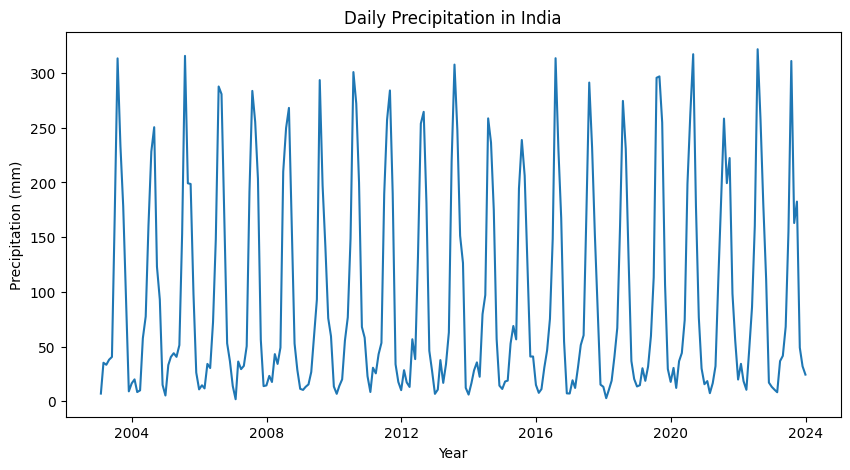

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_rain_data)
plt.title('Daily Precipitation in India')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.show()

In [15]:
# Check for stationarity
result_india = adfuller(monthly_rain_data)
print('India ADF Statistic:', result_india[0])
print('India p-value:', result_india[1])

India ADF Statistic: -3.2044680977722972
India p-value: 0.019727500555536147


##### Conclusion: Data is Stationary

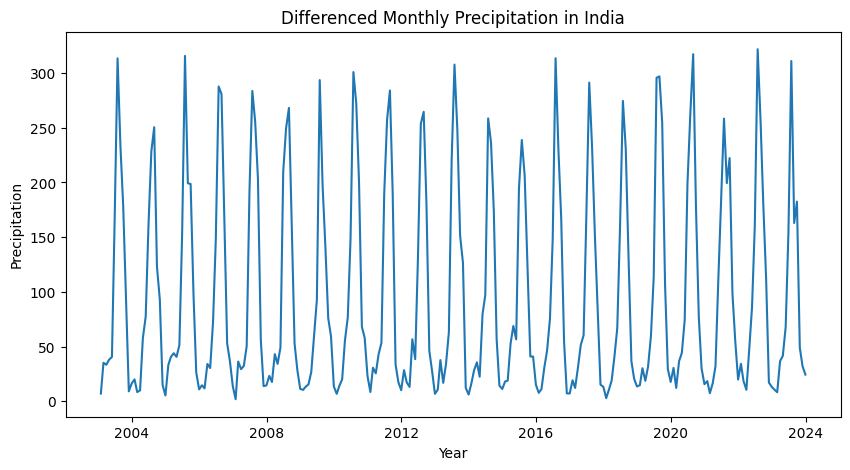

In [16]:
if result_india[1] > 0.05:
    india_data_diff = monthly_rain_data.diff().dropna()
    result_india_diff = adfuller(india_data_diff)
    print('India Differenced ADF Statistic:', result_india_diff[0])
    print('India Differenced p-value:', result_india_diff[1])
else:
    india_data_diff = monthly_rain_data

plt.figure(figsize=(10, 5))
plt.plot(india_data_diff)
plt.title('Differenced Monthly Precipitation in India')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.show()

In [17]:

# Fit the ARMA(1, 1) model
model_india = ARIMA(india_data_diff, order=(1, 0, 1))
model_india_fit = model_india.fit()

# Print the model summary
print(model_india_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  252
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1381.360
Date:                Wed, 02 Oct 2024   AIC                           2770.719
Time:                        15:38:47   BIC                           2784.837
Sample:                    01-31-2003   HQIC                          2776.400
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.2852     19.365      4.920      0.000      57.330     133.241
ar.L1          0.6120      0.085      7.237      0.000       0.446       0.778
ma.L1          0.3931      0.080      4.919      0.0

In [18]:
start_india = len(india_data_diff)
end_india = start_india + (21*12)
predictions_india = model_india_fit.predict(start=start_india, end=end_india)

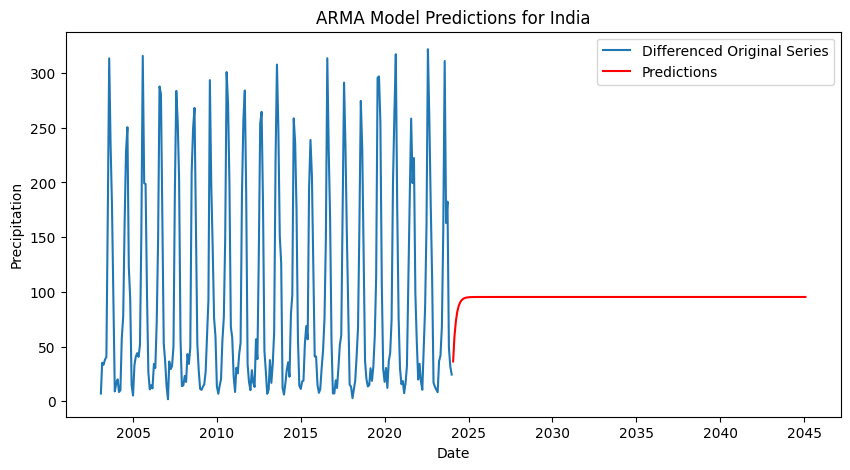

In [19]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(india_data_diff, label='Differenced Original Series')
plt.plot(predictions_india, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions for India')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [20]:
pip install scikit-learn

In [21]:
best_aic = float('inf')
best_order_india = None
best_model_india = None

for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(india_data_diff, order=(p, 0, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order_india = (p, 0, q)
                best_model_india = model_fit
        except Exception as e:
            print(f"Error fitting ARMA({p}, 0, {q}): {str(e)}")

print('Best ARMA order for India:', best_order_india)
print('Best AIC:', best_aic)

if best_model_india is not None:
    print(best_model_india.summary())
else:
    print("No valid model was found.")

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

Best ARMA order for India: (4, 0, 4)
Best AIC: 2479.8747021587906
                               SARIMAX Results                                
Dep. Variable:          Mean_Rainfall   No. Observations:                  252
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1229.937
Date:                Wed, 02 Oct 2024   AIC                           2479.875
Time:                        15:39:18   BIC                           2515.169
Sample:                    01-31-2003   HQIC                          2494.076
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.4630      4.081     23.394      0.000      87.465     103.461
ar.L1          2.7235      0.023    117.958      0.000       2.67

c:\Users\harsh\Desktop\Btech_project\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\harsh\AppData\Local\Temp\ipykernel_23460\2667355048.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=india_data_diff.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='M')


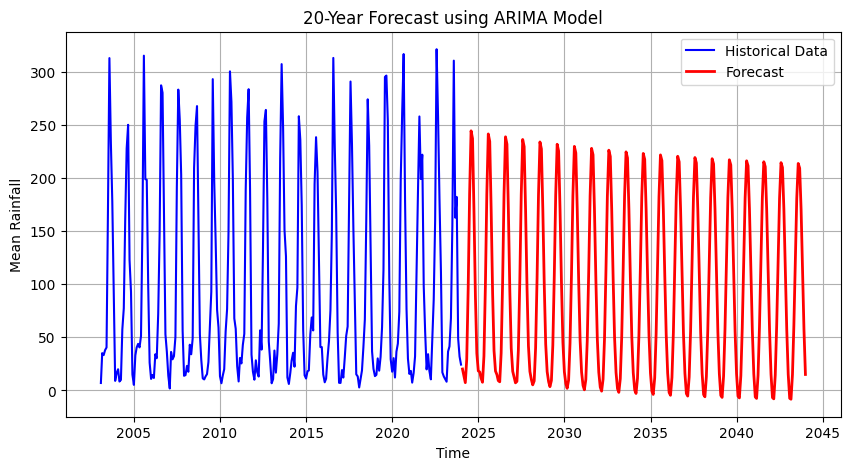

In [22]:
# Forecasting the next 20 years (240 months for monthly data)
forecast_period = 240  # Change based on your data frequency
forecast = best_model_india.get_forecast(steps=forecast_period)
forecast_index = pd.date_range(start=india_data_diff.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='M')
forecast_values = forecast.predicted_mean

# Plotting the historical data and forecast
plt.figure(figsize=(10,5))
plt.plot(india_data_diff.index, india_data_diff, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linewidth=2)  # Single line for forecast

plt.title('20-Year Forecast using ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Mean Rainfall')
plt.legend()
plt.grid()
plt.show()
